# London Housing Study



### Backgroud/Objective
This is one of my first data science project through the Springboard bootcamp. Here I am applying my recently acquired knowledge of the pandas and matplotlib python libraries. There are 32 boroughs in Greater London and my job is to answer the question: **which borough of london has the greatest increase in housing over the past two decades (1998-2018)?** In this Jupyter notebook, I will work through solving this problem and afterwords continuing on and looking at a few additional statistics that I think are interesting about London Housing.

### Sources
I have pulled the data set from the <a src="https://data.london.gov.uk/">London Data Store</a>


### 1.1 Importing Libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import openpyxl

#### 1.2 Loading Data
Here I am loading in the data using the pandas read_excel() Method specifying the sheet name as 'Average Price'

In [2]:
properties = pd.read_excel('London_Housing.xlsx', 
                           sheet_name='Average price', index_col=None)

### 2.1 Cleaning Transforming and Visualizing
Here I am just checking out the data frame we laded prior using the shape attribute and head() method

In [152]:
properties.shape

(316, 49)

In [3]:
properties.head(10)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,NaN,53678.24041
6,1995-06-01,94900.51244,53700.34831,90107.23471,64252.32335,74310.48167,82382.83435,121887.4625,69052.51103,81630.66181,...,44112.96432,45392.63981,45679.99539,50100.43023,56288.94557,75606.24501,65511.008,54420.15939,NaN,53735.15475
7,1995-07-01,110128.0423,52113.12157,91441.24768,63722.70055,74127.03788,82898.52264,124027.5768,69142.48112,82352.2226,...,44109.58764,45534.99864,46037.67312,49860.00809,57242.30186,75984.24079,65224.88465,54265.86368,NaN,53900.60633
8,1995-08-01,112329.4376,52232.19868,92361.31512,64432.60005,73547.0411,82054.37156,125529.8039,68993.42545,82706.65927,...,44193.66583,45111.45939,45922.53585,49598.45969,56732.40547,75529.34488,64851.60429,54365.71495,NaN,53600.31975
9,1995-09-01,104473.1096,51471.61353,93273.12245,64509.54767,73789.54287,81440.43008,120596.8511,69393.50023,82011.08271,...,44088.07696,44837.86023,45771.66321,49319.69715,56259.28635,74940.80872,64352.47119,54243.98694,NaN,53309.2331


### 2.2 Cleaning Data (part 1)
First I am transposing the data so that all of the dates become column instead of rows then I will reset the index

In [154]:
properties_t = properties.transpose()

In [155]:
properties_t.reset_index(inplace=True)

In [156]:
properties_t.head()

,index,0,1,2,3,4,5,6,7,8,...,306,307,308,309,310,311,312,313,314,315
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,882872.1038,786626.6665,827658.5167,798499.1646,825741.8194,770971.9595,794277.0501,762756.6049,744323.5882,864353.5338
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,300526.2859,304555.5886,304923.5027,301702.4656,304763.6014,305052.8104,310281.2864,314068.1054,319588.7141,317184.7975
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,518175.0457,523279.8903,529660.1524,533619.23,529762.3013,530930.9087,533160.1771,541621.6878,536096.0398,534005.4666
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,340893.0807,344091.2308,346679.9244,345061.4945,345458.6847,347115.9985,353710.4793,358242.6956,361861.3566,367014.6063


### 2.3 Cleaning Data (Part 2) 
**As you can see I need to set the dates to be the column names and then delete the first column. I then name the appropriate columns London_Borough and id**

In [157]:
properties_t.columns = properties_t.iloc[0]

In [158]:
properties_t.rename(columns={'Unnamed: 0': 'London_Borough', pd.NaT: "id"}, inplace=True)
properties_t.drop(0, inplace=True)

In [160]:
properties_t.tail(5)

,London_Borough,id,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00
44,LONDON,E12000007,74435.76052,72777.93709,73896.84204,74455.28754,75432.02786,75606.24501,75984.24079,75529.34488,...,478922.0948,483145.6046,488557.1748,492983.253,487501.9464,496536.0529,499007.6508,502652.1259,495402.2587,500310.1362
45,SOUTH EAST,E12000008,64018.87894,63715.02399,64113.60858,64623.22395,64530.36358,65511.008,65224.88465,64851.60429,...,322171.8325,325885.7689,329549.8357,332371.6618,333762.4754,338718.5987,341090.8236,341982.4267,345483.3565,348615.2004
46,SOUTH WEST,E12000009,54705.1579,54356.14843,53583.07667,54786.01938,54698.83831,54420.15939,54265.86368,54365.71495,...,259493.3119,264554.1113,265726.014,270737.2643,272516.3092,275203.5798,279222.691,278722.6704,280372.7523,287649.7245
47,Unnamed: 47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,England,E92000001,53202.77128,53096.1549,53201.2843,53590.8548,53678.24041,53735.15475,53900.60633,53600.31975,...,250850.8318,253481.5843,256134.6892,258544.5629,260625.6275,264077.0814,267363.3526,267675.2146,269976.0467,274615.3652


### 2.4 Cleaning Data (Part 3)
You can see in the cell above that we have na values in the sells named Unnamed: 47,34, 37; so, we need to filter these rows out of the data set. I did this using the dropna method setting a threshhold of 5 requiring 5 NA values in a row in order to be dropped.

In [24]:
#getting rid of na values
na_free = properties_t.dropna(thresh=5)

**There are also only 32 london boroughs and we currently have 50 rows of data; so here we filter out the boroughs that are not valid london boroughs**

In [25]:
#list of non london boroughs
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [29]:
#getting rid of non london boroughs
filt = na_free['London_Borough'].isin(nonBoroughs)
filtered_df = na_free[~filt]

In [161]:
filtered_df.head(33)

,London_Borough,id,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,882872.1038,786626.6665,827658.5167,798499.1646,825741.8194,770971.9595,794277.0501,762756.6049,744323.5882,864353.5338
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,300526.2859,304555.5886,304923.5027,301702.4656,304763.6014,305052.8104,310281.2864,314068.1054,319588.7141,317184.7975
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,518175.0457,523279.8903,529660.1524,533619.23,529762.3013,530930.9087,533160.1771,541621.6878,536096.0398,534005.4666
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,340893.0807,344091.2308,346679.9244,345061.4945,345458.6847,347115.9985,353710.4793,358242.6956,361861.3566,367014.6063
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,484159.9118,482303.0931,497729.0327,519561.8277,521251.3469,512271.0532,495230.52,508184.2874,513426.445,510532.7941
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,425444.1926,428557.2475,433422.5529,435059.5551,438365.9497,446070.0216,455443.4492,459231.9815,461772.937,463226.493
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,837718.8375,807904.3593,824742.2295,839031.823,826733.3687,818996.7686,799707.7587,816544.3502,820737.9968,796441.8986
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,372413.7578,377278.4015,374029.6601,377322.4452,377155.9086,381267.3768,381462.2562,386804.4878,389486.9505,385345.3301
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,463423.6569,466117.1379,483810.1893,490927.7747,492737.901,495730.2602,496607.473,499463.3694,497977.0355,490426.1105
10,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,385347.4851,386064.7204,397144.6805,399741.7122,405961.5964,405703.8597,413058.8666,418295.7115,416895.3845,428256.8174


### 2.5 Transforming Data
**we now have 32 london boroughs and the only non borough being City of London giving us 33 entries per date. Now we must melt our data frame down so that we have the month as one column**

In [32]:
melted_df = pd.melt(filtered_df, id_vars= ['London_Borough', 'id'],
                    var_name='Month', value_name='Price')

In [33]:
#taking th
melted_df["Year"] = melted_df["Month"].apply(lambda x: x.year)

In [34]:
# set the data type of the price column to be float
melted_df['Price'] = melted_df['Price'].astype(float)

In [35]:
melted_df

,London_Borough,id,Month,Price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995
...,...,...,...,...,...
10390,Sutton,E09000029,2021-03-01,395397.08970,2021
10391,Tower Hamlets,E09000030,2021-03-01,496246.71500,2021
10392,Waltham Forest,E09000031,2021-03-01,490895.15880,2021
10393,Wandsworth,E09000032,2021-03-01,598279.43470,2021


### 2.6: visualizing individual Borough data
**We are going to visualize two boroughs, barnet and sutton.

In [140]:
#setting matplot lib scale of graphs
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 75

In [81]:
barnet = melted_df[melted_df['London_Borough'] == 'Barnet']
sutton = melted_df[melted_df['London_Borough'] == 'Sutton']

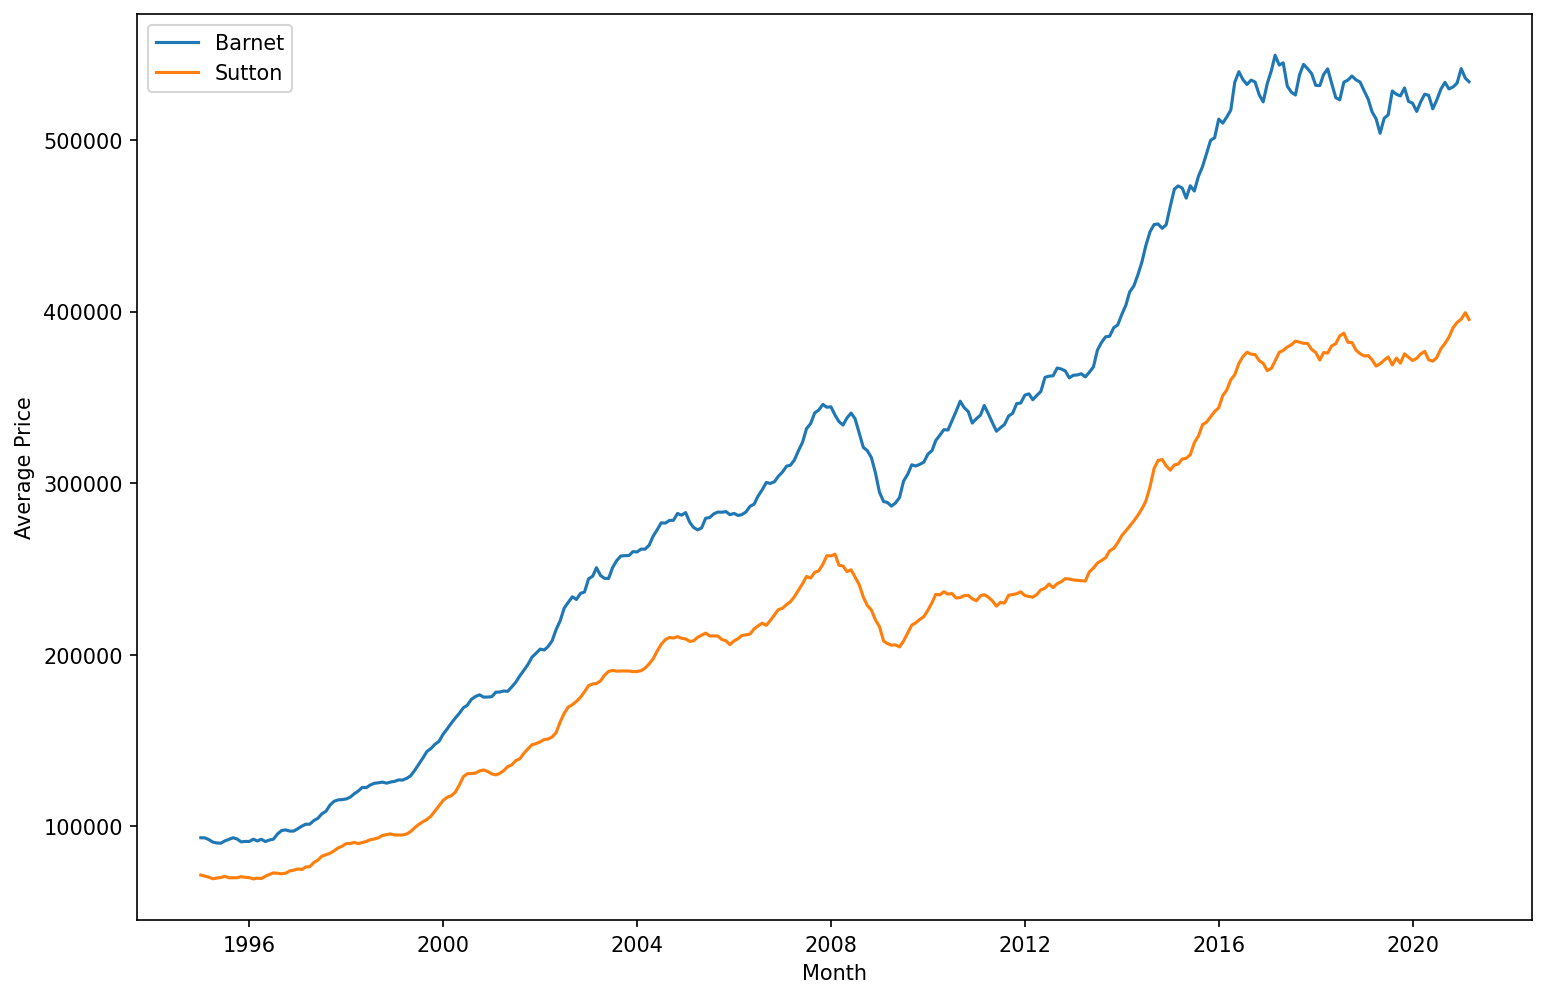

In [83]:
b_price = barnet['Price']
b_month = barnet['Month']
s_price = sutton['Price']
s_month = sutton['Month']

fig, (axb) = plt.subplots(nrows=1, ncols=1)
axb.plot(b_month, b_price, label='Barnet')
axb.plot(s_month, s_price, label='Sutton')
axb.set_ylabel('Average Price')
axb.set_xlabel('Month')
axb.legend()


**We are going to group london borough by year and london borough whilst saving the mean throughout that year in the price column**

In [163]:
gdf = melted_df.groupby(by=['London_Borough', 'Year']).mean()

In [164]:
gdf.reset_index(inplace=True)

### 3.0: Modeling
Here we are going to create a new data frame of all of the price ratios and ultimately solve our problem by visualizing the top ratios and seing which borough had the highest ratio.

In [162]:
def create_ratio(d, present, past):
   
    y_past = float(d['Price'][d['Year'] == past])
    y_pres = float(d['Price'][d['Year'] == present])
    return [y_pres / y_past]
    


In [144]:
ratio_dict = dict()

In [145]:
def create_dict(present, past):
    for borough in gdf['London_Borough'].unique():
        df = gdf[gdf['London_Borough'] == borough]
        ratio_dict[borough] = create_ratio(df, present, past)    

In [146]:
create_dict(2018, 1998)
ratio_dict

{'Barking & Dagenham': [4.89661861291754],
 'Barnet': [4.358195917538044],
 'Bexley': [4.248977046127877],
 'Brent': [4.8945544971392865],
 'Bromley': [4.0947846853338765],
 'Camden': [4.935353408884261],
 'City of London': [5.301620377587609],
 'Croydon': [4.201100280024767],
 'Ealing': [4.311450902121834],
 'Enfield': [4.26347158349581],
 'Greenwich': [4.763036347329193],
 'Hackney': [6.198285561008662],
 'Hammersmith & Fulham': [4.137798101936229],
 'Haringey': [5.134624964136042],
 'Harrow': [4.0591964329643195],
 'Havering': [4.325230371335308],
 'Hillingdon': [4.2002730803844575],
 'Hounslow': [3.976409106143329],
 'Islington': [4.844048012802298],
 'Kensington & Chelsea': [5.082465066092464],
 'Kingston upon Thames': [4.270549521484271],
 'Lambeth': [4.957751163514063],
 'Lewisham': [5.449221041059685],
 'Merton': [4.741273313294604],
 'Newham': [5.305390437201879],
 'Redbridge': [4.471182006097364],
 'Richmond upon Thames': [4.005161895721457],
 'Southwark': [5.516485302379376]

In [147]:
rdf = pd.DataFrame(ratio_dict).transpose().reset_index()

In [148]:
rdf.rename(columns={'index': 'London_Borough', 0:"ratio"}, inplace=True)

In [149]:
rdf.sort_values(by='ratio', ascending=False, inplace=True)

In [150]:
top10 = rdf.head(10)

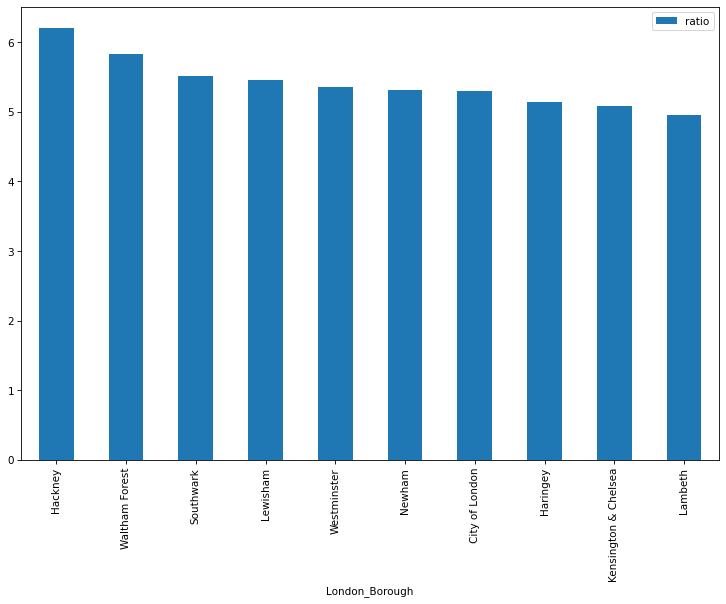

In [151]:
ax = top10.plot(x='London_Borough', y='ratio', kind='bar')

### Coluclusion
We can conclued that Hackney had the highest increase in average price over the past two decades when compared to the other London Boroughs

## Further Exploration

Which london borough had the most volatile housing prices over the past two decades? which had the most stable?
All of the London Boroughs generally had an upward trending average price, which would imply that December would likely have the highest prices and January the lowest. Is this true? Which month had the highest prices on average accross all boroughs?



